Run the cell below to import the training and test data.

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers, losses, callbacks

#df1=pd.read_csv('/kaggle/input/nifty-50-stock-data-0115-to-0619/NIFTY 50-01-01-2015-to-31-12-2015.csv')
#df2=pd.read_csv('/kaggle/input/nifty-50-stock-data-0115-to-0619/NIFTY 50-01-01-2016-to-31-12-2016.csv')
#df3=pd.read_csv('/kaggle/input/nifty-50-stock-data-0115-to-0619/NIFTY 50-01-01-2017-to-31-12-2017.csv')
#df4=pd.read_csv('/kaggle/input/nifty-50-stock-data-0115-to-0619/NIFTY 50-01-01-2018-to-31-12-2018.csv')
#df5=pd.read_csv('/kaggle/input/nifty-50-stock-data-0115-to-0619/NIFTY 50-01-01-2019-to-30-06-2019.csv')

#training_data=pd.concat([df1, df2, df3, df4, df5])
data=pd.read_csv("C:\\Desktop\\Finsearch_23_G12\\Stock_data\\Nifty_50_2000-2023\\Nifty_50_with_indicators_.csv")
data['Date']=pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
#print(training_data)

# set the testing data
test_data_output = pd.DataFrame(data['close'][5000:5581])
test_data_input = pd.DataFrame(data[['open', 'high', 'low']][5000:5581])
#print(test_data_input)
#print(test_data_output)

# set the training data
train_data_output = pd.DataFrame(data['close'][0:3500])
train_data_input = pd.DataFrame(data[['open', 'high', 'low']][0:3500])
#print(train_data_input)
#print(train_data_output)

#set the validation data
val_data_output = pd.DataFrame(data['close'][3500:5000])
val_data_input = pd.DataFrame(data[['open', 'high', 'low']][3500:5000])
#print(val_data_input)
#print(val_data_output)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_9200\563708368.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_data_output = pd.DataFrame(data['close'][5000:5581])
C:\Users\Ishan\AppData\Local\Temp\ipykernel_9200\563708368.py:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_data_output = pd.DataFrame(data['close'][0:3500])
C:\Users\Ishan\AppData\Local\Temp\ipykernel_9200\563708368.py:31: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is depr

Run the cell below to train your model.

In [2]:
model = keras.Sequential([
    #input layer
    keras.layers.Dense(3, activation='relu', input_shape=[3]),
    #keras.layers.Dropout(0.2),

    #hidden layers
    #keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    
    #output layer
    keras.layers.Dense(1, activation='linear')
])

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Set the laerning rate
learning_rate = 0.001

# Choose the optimizer
optimizer = optimizers.Adam(learning_rate=learning_rate)
#optimizer = optimizers.RMSprop(learning_rate=learning_rate)
#optimizer = optimizers.SGD(learning_rate=learning_rate)
#optimizer = optimizers.Adagrad(learning_rate=learning_rate)

# Choose the loss function
#loss=losses.mean_absolute_error
loss=losses.mean_squared_error
#loss=losses.binary_crossentropy

model.compile(optimizer=optimizer, loss=loss)

model.fit(train_data_input ,train_data_output, validation_data=(val_data_input ,val_data_output), epochs=25, batch_size=100,  callbacks=[early_stopping])

Epoch 1/25
35/35 [==============================] - 8s 88ms/step - loss: 2871017.0000 - val_loss: 228125.7031
Epoch 2/25
35/35 [==============================] - 3s 80ms/step - loss: 49555.5664 - val_loss: 31264.3047
Epoch 3/25
35/35 [==============================] - 3s 86ms/step - loss: 18375.5977 - val_loss: 40234.6719
Epoch 4/25
35/35 [==============================] - 3s 82ms/step - loss: 16600.2715 - val_loss: 41662.3594
Epoch 5/25
35/35 [==============================] - 4s 91ms/step - loss: 16302.2539 - val_loss: 23776.5059
Epoch 6/25
35/35 [==============================] - 3s 81ms/step - loss: 16903.5664 - val_loss: 23747.9316
Epoch 7/25
35/35 [==============================] - 3s 84ms/step - loss: 15606.3643 - val_loss: 36355.0898
Epoch 8/25
35/35 [==============================] - 4s 113ms/step - loss: 15735.9238 - val_loss: 23243.0820
Epoch 9/25
35/35 [==============================] - 3s 90ms/step - loss: 15291.8125 - val_loss: 23459.4531
Epoch 10/25
35/35 [==============

Run the cell below to test your model.

In [3]:
print("Actual : ", test_data_output.values[0][0])
print("Predicted : ",model.predict(test_data_input)[0][0])

Actual :  12089.15
19/19 [==============================] - 1s 10ms/step
Predicted :  11956.12


In [4]:
Actual=[]
for i in range(len(test_data_output)):
    Actual.append(test_data_output.values[i][0])
Predicted=[]
for i in range(len(test_data_output)):
    Predicted.append(model.predict(test_data_input)[i][0])
    print('Progress : ', i, "/", len(test_data_input))

19/19 [==============================] - 0s 11ms/step
Progress :  0 / 581
19/19 [==============================] - 0s 11ms/step
Progress :  1 / 581
19/19 [==============================] - 0s 12ms/step
Progress :  2 / 581
19/19 [==============================] - 0s 11ms/step
Progress :  3 / 581
19/19 [==============================] - 0s 12ms/step
Progress :  4 / 581
19/19 [==============================] - 0s 11ms/step
Progress :  5 / 581
19/19 [==============================] - 0s 12ms/step
Progress :  6 / 581
19/19 [==============================] - 0s 15ms/step
Progress :  7 / 581
19/19 [==============================] - 0s 11ms/step
Progress :  8 / 581
19/19 [==============================] - 0s 12ms/step
Progress :  9 / 581
19/19 [==============================] - 0s 11ms/step
Progress :  10 / 581
19/19 [==============================] - 0s 11ms/step
Progress :  11 / 581
19/19 [==============================] - 0s 10ms/step
Progress :  12 / 581
19/19 [============================

In [22]:
%pip install matplotlib

                                              0.0/7.5 MB ? eta -:--:--
     --                                       0.4/7.5 MB 13.5 MB/s eta 0:00:01
     ----                                     0.9/7.5 MB 11.8 MB/s eta 0:00:01
     -------                                  1.4/7.5 MB 10.9 MB/s eta 0:00:01
     ---------                                1.8/7.5 MB 10.5 MB/s eta 0:00:01
     ------------                             2.3/7.5 MB 10.4 MB/s eta 0:00:01
     --------------                           2.8/7.5 MB 10.4 MB/s eta 0:00:01
     -----------------                        3.2/7.5 MB 10.8 MB/s eta 0:00:01
     -------------------                      3.7/7.5 MB 10.4 MB/s eta 0:00:01
     ----------------------                   4.2/7.5 MB 10.7 MB/s eta 0:00:01
     ------------------------                 4.7/7.5 MB 10.3 MB/s eta 0:00:01
     ---------------------------              5.2/7.5 MB 10.3 MB/s eta 0:00:01
     ------------------------------           5.7/7.5 MB 10.


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


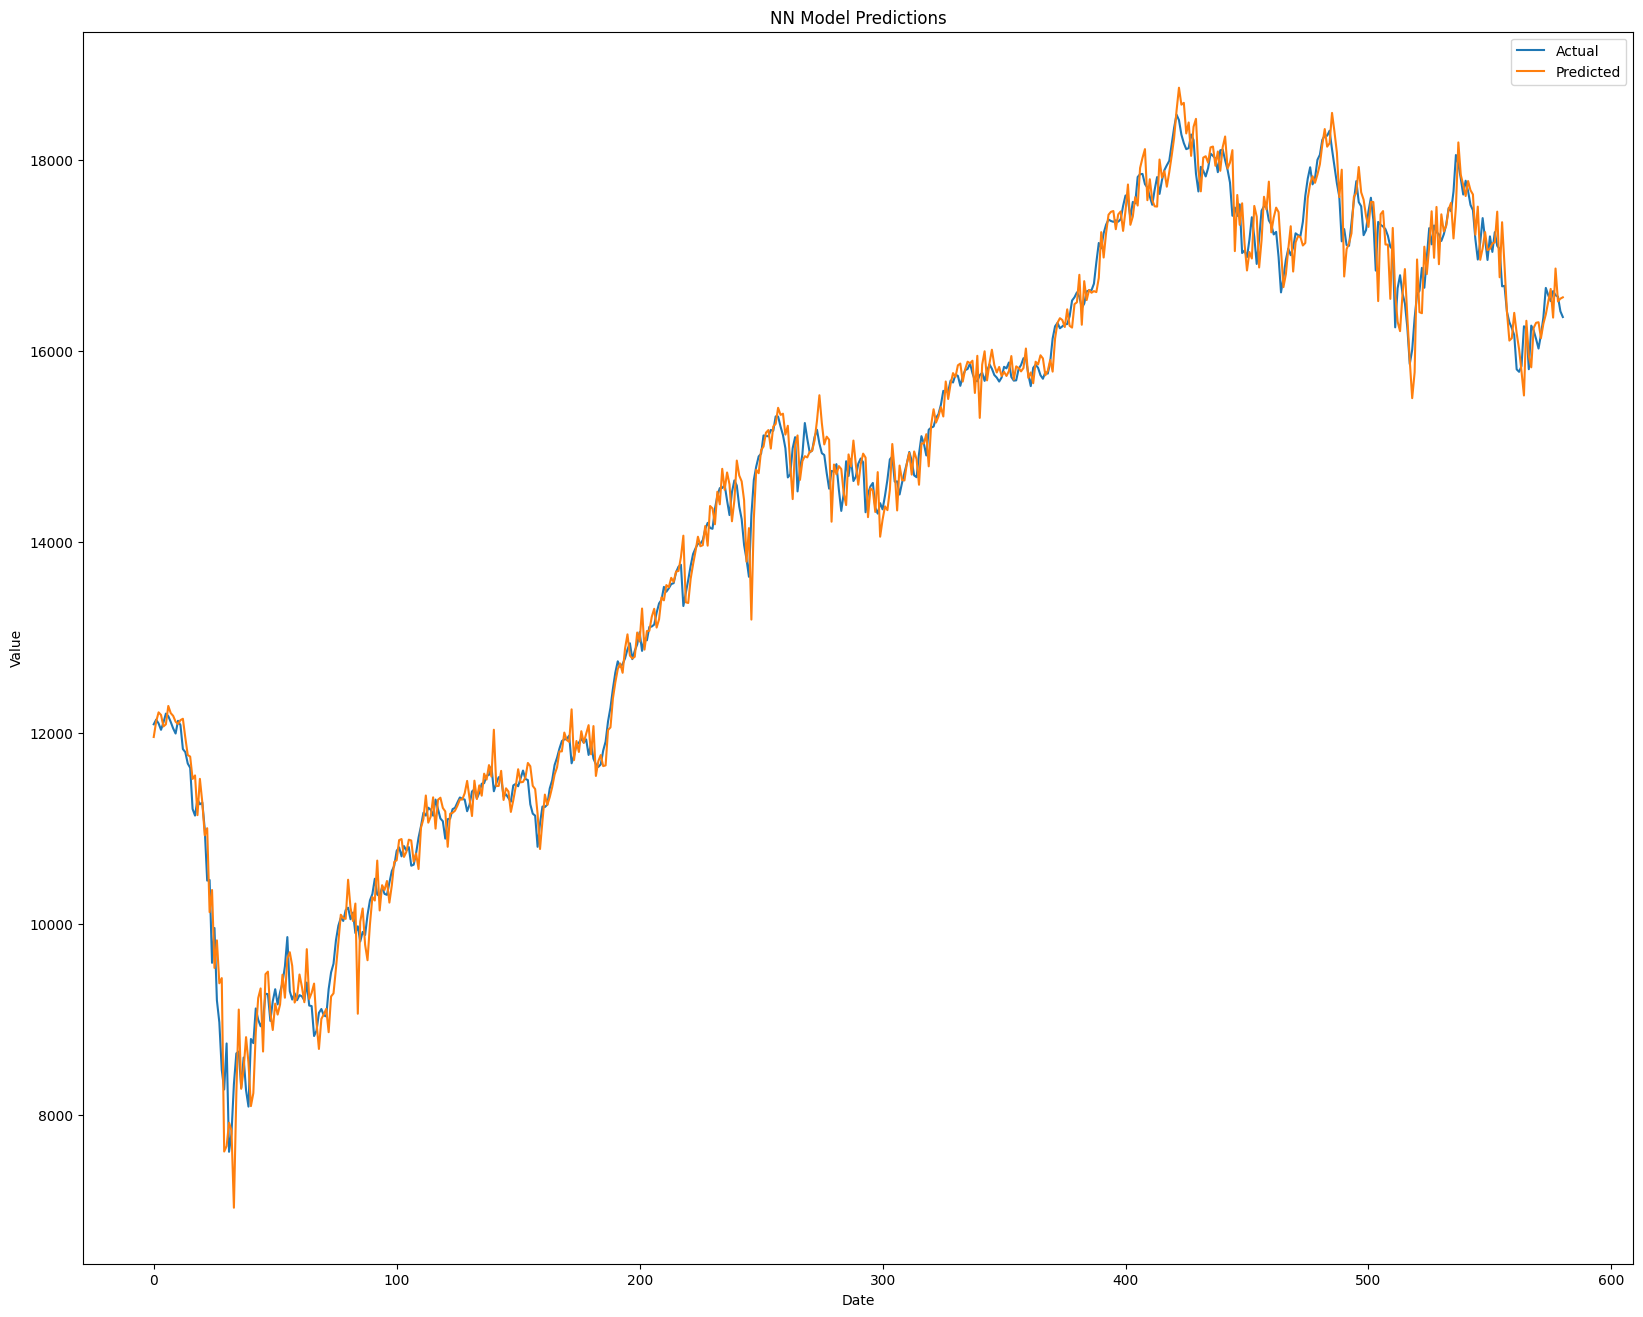

In [5]:
# Plot actual vs. predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
plt.plot(Actual, label='Actual')
plt.plot(Predicted, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('NN Model Predictions')
plt.legend()
plt.show()